## Problem 1.

Suppose that you have some images that need to be loaded from some server and be shown to
the user. Since the loading may take some time, we want to have proxy images in case the real
images are not loaded after some fixed amount of time. Simulate this scenario with classes of
your choice and using proxy design pattern principle.

In [18]:
class PictureServer:
    
    def __init__(self, picture):
        self.server_db_proxy = LoadingProxy(picture)
        
    def enter_db(self):
        self.server_db_proxy.Display()
    
class Picture:
    
    def __init__(self, picture_code, size):
        self.picture_code = picture_code
        self.size = size
        self.website = PictureServer(self)
        
    def enter_db(self):
        self.website.enter_db()

class Loading:
    '''Resource-intensive object'''
  
    def Display(self):
        print("Displaying the picture")
  
  
class LoadingProxy:
    '''Relatively less resource-intensive proxy acting as middleman.
     Instantiates a Loading object ONLY if the loading time (aka pic size) is small.'''
  
    def __init__(self, picture):
  
        self.picture = picture
        self.loading = None
  
    def Display(self):
  
        print("Proxy in action. Checking to see if the loading time is small.")
        if self.picture.size <= 2:
            # If the loading time is less than 2 min (2MB), display.
            self.loading = Loading()
            self.loading.Display()
        else:
  
            # Otherwise, don't instantiate the Loading object.
            print("Original picture is too big. Displaying the proxy picture.")

In [19]:
pic = Picture(picture_code=1, size=1)
pic.enter_db()
print('\n')

  
tom2 = Picture(picture_code=2, size=10)
tom2.enter_db()

Proxy in action. Checking to see if the loading time is small.
Displaying the picture


Proxy in action. Checking to see if the loading time is small.
Original picture is too big. Displaying the proxy picture.


## Problem 2.

Use flyweight design pattern and classes of your choice to implement the logic in the diagram
below. The tree factory should decide if it needs to create a new tree object or reuse an existing
one, based on the values of the attributes.

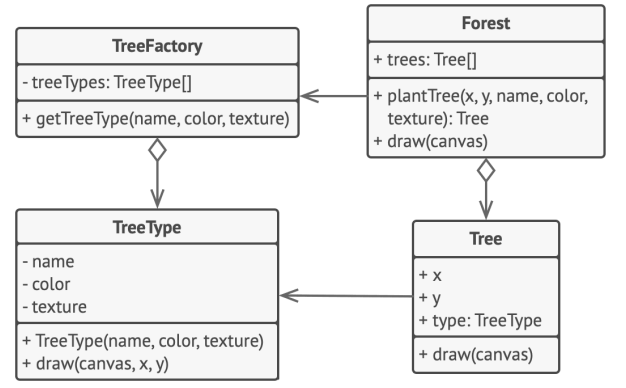

In [20]:
import json
from typing import Dict


class Tree():

    def __init__(self, shared_state):
        self._shared_state = shared_state

    def operation(self, unique_state):
        s = json.dumps(self._shared_state)
        u = json.dumps(unique_state)
        print(f"Tree: Displaying shared ({s}) and unique ({u}) state.", end="")


class TreeFactory():

    _trees = {}

    def __init__(self, initial_trees):
        for state in initial_trees:
            self._trees[self.get_key(state)] = Tree(state)

    def get_key(self, state):
        """
        Returns a Tree's string hash for a given state.
        """

        return "_".join(sorted(state))

    def get_Tree_Type(self, shared_state):
        """
        Returns an existing Tree with a given state or creates a new one.
        """

        key = self.get_key(shared_state)

        if not self._trees.get(key):
            print("TreeFactory: Can't find a tree, creating new one.")
            self._trees[key] = Tree(shared_state)
        else:
            print("TreeFactory: Reusing existing tree.")

        return self._trees[key]
    
    def list_trees(self):
        count = len(self._trees)
        print(f"TreeFactory: I have {count} trees:")
        print("\n".join(map(str, self._trees.keys())))


def add_tree_to_factory_warehouse(factory: TreeFactory, id_, buyer,
                               name, color, texture):
    print("\n\nClient: Adding a tree to database.")
    tree = factory.get_Tree_Type([name, color, texture])
    tree.operation([id_, buyer])

In [21]:
"""
The client code usually creates a bunch of pre-populated trees in the
initialization stage of the application.
"""

factory = TreeFactory([
    ["Apple", "yellow", "Sticky"],
    ["Apple", "green", "Bumpy"],
    ["Apricot", "orange", "Sticky"],
    ["Banana", "yellow", "Sticky"],
    ["Spruce", "gray", "Fuzzy"],
])

In [22]:
add_tree_to_factory_warehouse(
    factory, "123", "Ann", "Apple", "yellow", "Sticky")

add_tree_to_factory_warehouse(
    factory, "456", "Pole", "Apple", "red", "Sticky")

print("\n")

factory.list_trees()



Client: Adding a tree to database.
TreeFactory: Reusing existing tree.
Tree: Displaying shared (["Apple", "yellow", "Sticky"]) and unique (["123", "Ann"]) state.

Client: Adding a tree to database.
TreeFactory: Can't find a tree, creating new one.
Tree: Displaying shared (["Apple", "red", "Sticky"]) and unique (["456", "Pole"]) state.

TreeFactory: I have 6 trees:
Apple_Sticky_yellow
Apple_Bumpy_green
Apricot_Sticky_orange
Banana_Sticky_yellow
Fuzzy_Spruce_gray
Apple_Sticky_red
